# Long Short-Term Memory (LSTM)

In [1]:
import sys
import os
from os import path
import importlib

import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

SRC_DIR = path.join(os.path.abspath(""), '../')
sys.path.append(SRC_DIR)

from core import _
import hist_data as hd

In [ ]:
_('''
### My readings:

* [Long Short-Term Memory (LSTM), Clearly Explained](https://www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&index=151)
* [How to apply LSTM using PyTorch](https://cnvrg.io/pytorch-lstm/)
* [LSTM documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
''')


### My readings:

* [Long Short-Term Memory (LSTM), Clearly Explained](https://<br>www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&inde<br>x=151)
* [How to apply LSTM using PyTorch](https://cnvrg.io/pytorch-lstm/)<br>

In [340]:
hd.set_hist_data(data_count=None)

In [874]:
import nn_tools.lstm as ls
importlib.reload(ls)
import nn_tools.data_source as ns
importlib.reload(ns)
import nn_tools.data_sequencer as ds
importlib.reload(ds)

<module 'nn_tools.data_sequencer' from 'c:\\users\\stefa\\documents\\workspaces\\szx81\\szx81\\nn_tools\\data_sequencer.py'>

## NN Driver test begin

In [875]:
dr = ls.NnDriver(
        data_source_class=ns.ForexDataSource,
        model_class=ls.Model,
        future_len=10,
        num_layers=7,
        verbose=True
        )

In [627]:
_(f'''
Inteligencja jest tu modelowana szeregiem `num_layers`={dr.model.num_layers} modułów *LSTM* - bloków neuronowych. Każ 
''')


Inteligencja jest tu modelowana szeregiem `num_layers`=6 modułów *LSTM* -<br>bloków neuronowych. Każ<br>

In [595]:
print('NnDriver model:', dr.model)

NnDriver model: Model(
  (model): LSTM(10, 100, num_layers=5, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)


In [876]:
dr.train(end_day=10, data_count=2000, verbose=False)

begin index: 2880, end index: 4900, count:2000


In [877]:
shift = 1

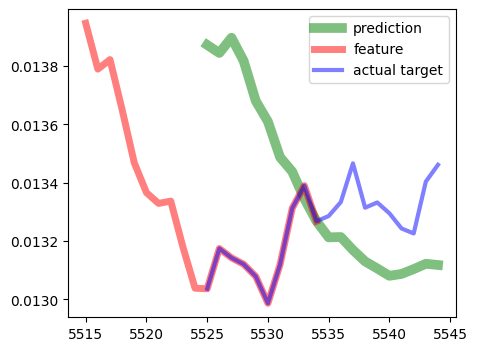

In [910]:
dr.show_action(shift=shift, count=dr.context_seq.future_len + 10)
shift += 1

## Forex Training&Testing data

end=2880 data len=25, seq_len=10, count=10 future_len=5
x:
[[2854 2855 2856 2857 2858 2859 2860 2861 2862 2863]
 [2855 2856 2857 2858 2859 2860 2861 2862 2863 2864]
 [2856 2857 2858 2859 2860 2861 2862 2863 2864 2865]
 [2857 2858 2859 2860 2861 2862 2863 2864 2865 2866]
 [2858 2859 2860 2861 2862 2863 2864 2865 2866 2867]
 [2859 2860 2861 2862 2863 2864 2865 2866 2867 2868]
 [2860 2861 2862 2863 2864 2865 2866 2867 2868 2869]
 [2861 2862 2863 2864 2865 2866 2867 2868 2869 2870]
 [2862 2863 2864 2865 2866 2867 2868 2869 2870 2871]
 [2863 2864 2865 2866 2867 2868 2869 2870 2871 2872]]
y:
[2868 2869 2870 2871 2872 2873 2874 2875 2876 2877]


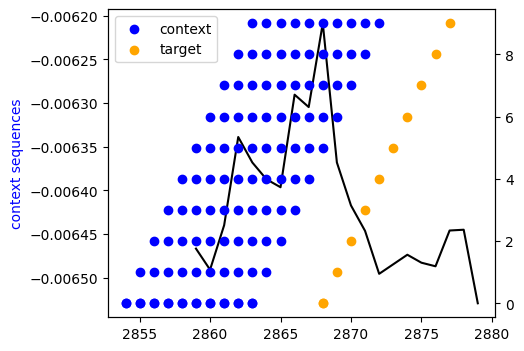

In [460]:
NUM_LAYERS = 3
end_day = 2
input_size = 10
future_len = 5

# [-6.368e-03 -6.387e-03 -6.396e-03 -6.290e-03 -6.305e-03 -6.209e-03
cs = ds.ContextSequencer(
    ds.ForexDataSource, end_day=end_day, seq_len=input_size, 
    future_len=future_len)
cs.plot()

In [585]:
import textwrap

import core
importlib.reload(core)
from core import _, _nw

text = """
This method wraps the input paragraph such that each line is at most width characters long in the paragraph.
If the input has some content, it returns a list of lines as output.
This method wraps the input paragraph such that each line is at most width characters long in the paragraph. 
If the input has some content, it returns a list of lines as output.
"""


def wrap_text(text, width=80):
    wrapped_text = ''
    for element in textwrap.TextWrapper(
        width=width,
        replace_whitespace=False
        ).wrap(text=text):
        wrapped_text += element + '<br>'
    return wrapped_text

wrap_text(text)

_(text)


This method wraps the input paragraph such that each line is at most width<br>characters long in the paragraph.
If the input has some content, it returns a<br>list of lines as output.
This method wraps the input paragraph such that each<br>line is at most width characters long in the paragraph. 
If the input has some<br>content, it returns a list of lines as output.<br>